In [1]:
import numpy as np
import pandas as pd

In [2]:
"""
函数功能：创建特征向量和标签向量
参数说明：
file：原始文件路径
返回：
xMat：特征向量
yMat：标签向量
"""
def loadDataSet(file):
    dataSet= pd.read_table(file,header = None)
    xMat=np.mat(dataSet.iloc[:,:-1].values)
    yMat=np.mat(dataSet.iloc[:,-1].values).T
    return xMat,yMat

In [3]:
file='testSet.txt'
dataSet= pd.read_table(file,header = None)

In [5]:
dataSet.head()

,0,1,2
0,3.542485,1.977398,-1
1,3.018896,2.556416,-1
2,7.551510,-1.580030,1
3,2.114999,-0.004466,-1
4,8.127113,1.274372,1


In [12]:
xMat = np.mat(dataSet.iloc[:,:-1].values)
xMat[:10]

matrix([[ 3.542485e+00,  1.977398e+00],
        [ 3.018896e+00,  2.556416e+00],
        [ 7.551510e+00, -1.580030e+00],
        [ 2.114999e+00, -4.466000e-03],
        [ 8.127113e+00,  1.274372e+00],
        [ 7.108772e+00, -9.869060e-01],
        [ 8.610639e+00,  2.046708e+00],
        [ 2.326297e+00,  2.652130e-01],
        [ 3.634009e+00,  1.730537e+00],
        [ 3.413670e-01, -8.949980e-01]])

In [14]:
yMat = np.mat(dataSet.iloc[:,-1].values).T
yMat[:10]

matrix([[-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [-1]], dtype=int64)

In [15]:
#导入数据集
file='testSet.txt'
xMat,yMat = loadDataSet(file)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
xMat.shape[0]

100

In [17]:
def showDataSet(xMat, yMat):
    data_p = [] #正样本
    data_n = [] #负样本
    m = xMat.shape[0] #样本总数
    for i in range(m):
        if yMat[i] > 0:
            data_p.append(xMat[i])
        else:
            data_n.append(xMat[i])
    data_p_ = np.array(data_p) #转换为numpy矩阵
    data_n_ = np.array(data_n) #转换为numpy矩阵
    plt.scatter(data_p_.T[0], data_p_.T[1]) #正样本散点图
    plt.scatter(data_n_.T[0], data_n_.T[1]) #负样本散点图
    plt.show()

In [20]:
data_p = [] #正样本
data_n = [] #负样本
m = xMat.shape[0] #样本总数
for i in range(m):
    if yMat[i] > 0:
        data_p.append(xMat[i])
    else:
        data_n.append(xMat[i])

In [24]:
data_p_ = np.array(data_p)
data_p_.T[0]

array([[7.55151 , 8.127113, 7.108772, 8.610639, 7.139979, 8.117032,
        8.497162, 8.197181, 7.886608, 7.40786 , 7.286357, 8.015003,
        8.991748, 7.916831, 7.616862, 7.270337, 8.804461, 8.410143,
        7.382988, 6.960661, 8.23446 , 8.168618, 9.229518, 7.886242,
        5.286862, 6.080573, 6.016004, 7.27946 , 8.102154, 8.132048,
        8.245938, 6.543888, 8.112593, 9.803425, 9.205805, 8.398012,
        7.239953, 7.556201, 9.015509, 8.266085, 8.54562 , 9.295969,
        8.092288, 9.854303, 7.921057, 8.500757]])

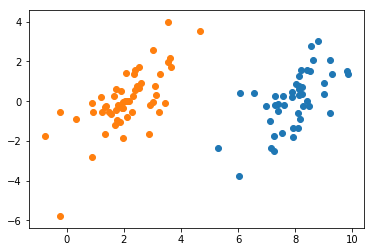

In [25]:
showDataSet(xMat, yMat)

In [26]:
import random

In [27]:
def selectJrand(i,m):
    j=i
    while (j==i):
        j=int(random.uniform(0,m))
    return j

In [28]:
m

100

In [30]:
int(random.uniform(0,m))

45

In [61]:
i=1
selectJrand(i,m)

84

In [62]:
def clipAlpha(aj,H,L):
    if aj>H:
        aj=H
    if L>aj:
        aj=L
    return aj

In [63]:
def smoSimple(xMat,yMat,C,toler,maxIter):
    b=0 #初始化b参数
    m,n=xMat.shape #m为数据集的总行数，n为特征的数量
    alpha = np.mat(np.zeros((m,1))) #初始化alpha参数，设为0
    iters =0 #初始化迭代次数
    while (iters<maxIter):
        alpha_ = 0 #初始化alpha优化次数
        for i in range(m):
            #步骤1：计算误差Ei
            fXi=np.multiply(alpha,yMat).T*(xMat*xMat[i,:].T)+b
            Ei=fXi-yMat[i]
            #优化alpha，设定容错率
            if ((yMat[i]*Ei<-toler)and(alpha[i]<C)) or((yMat[i]*Ei>toler)and(alpha[i]>0)):
            #随机选择一个与alpha_i成对优化的alpha_j
                j=selectJrand(i,m)
                #步骤1：计算误差Ej
                fXj=np.multiply(alpha,yMat).T*(xMat*xMat[j,:].T)+b
                Ej=fXj-yMat[j]
                #保存更新前的alpha_i和alpha_j
                alphaIold=alpha[i].copy()
                alphaJold=alpha[j].copy()
                #步骤2：计算上下界H和L
                if (yMat[i]!=yMat[j]):
                    L=max(0,alpha[j]-alpha[i])
                    H=min(C,C+alpha[j]-alpha[i])
                else:
                    L=max(0,alpha[j]+alpha[i]-C)
                    H=min(C,C+alpha[j]+alpha[i])
                if L==H:
                    #print('L==H')
                    continue
                #步骤3：计算学习率eta(eta是alpha_j的最优修改量)
                eta=2*xMat[i,:]*xMat[j,:].T-xMat[i,:]*xMat[i,:].T-xMat[j,:]*xMat[j,:].T
                if eta>=0:
                    #print('eta>=0')
                    continue
                #步骤4：更新alpha_j
                alpha[j]-= yMat[j]*(Ei-Ej)/eta
                #步骤5：修剪alpha_j
                alpha[j]=clipAlpha(alpha[j],H,L)
                if abs(alpha[j]-alphaJold)<0.00001:
                    #print('alpha_j 变化太小')
                    continue
                #步骤6：更新alpha_i
                alpha[i]+=yMat[j]*yMat[i]*(alphaJold-alpha[j])
                #步骤7：更新b_1和b_2
                b1=b-Ei-yMat[i]*(alpha[i]-alphaIold)*xMat[i,:]*xMat[i,:].T-yMat[j]*(alpha[j]-alphaJold)*xMat[i,:]*xMat[j,:].T
                b2=b-Ej-yMat[i]*(alpha[i]-alphaIold)*xMat[i,:]*xMat[j,:].T-yMat[j]*(alpha[j]-alphaJold)*xMat[j,:]*xMat[j,:].T
                #步骤8：根据b_1和b_2更新b
                if (0<alpha[i])and(C>alpha[i]): b=b1
                elif (0<alpha[j])and(C>alpha[j]): b=b2
                else: b=(b1+b2)/2
                #统计优化次数
                alpha_+=1
                #print(f'第{iters}次迭代 样本{i},alpha优化次数:{alpha_}')
        #更新迭代次数
        if alpha_==0: iters+=1
        else: iters=0
        #print(f'迭代次数为:{iters}')
    return b,alpha

In [64]:
%time b,alpha=smoSimple(xMat,yMat,0.6,0.001,5)

Wall time: 4min 4s


In [67]:
len(np.multiply(alpha,yMat))

100

In [69]:
np.multiply(alpha,yMat).T*(xMat*xMat[1,:].T)

matrix([[11.15717399]])

In [70]:
b

matrix([[-31.95984915]])

In [72]:
alpha[alpha>0]

matrix([[0.34277211, 0.6       , 0.6       , 1.2       , 0.6       ,
         0.2434147 , 0.19149751, 0.6       , 0.14046623]])

In [73]:
"""
函数功能：提取出支持向量，用于后面画图
"""
def get_sv(xMat,yMat,alpha):
    m=xMat.shape[0]
    sv_x=[]
    sv_y=[]
    for i in range(m):
        if alpha[i]>0:
            sv_x.append(xMat[i])
            sv_y.append(yMat[i])
    sv_x1 =np.array(sv_x).T
    sv_y1 = np.array(sv_y).T
    return sv_x1,sv_y1

In [74]:
#运行函数
sv_x1,sv_y1=get_sv(xMat,yMat,alpha)

In [77]:
sv_x1[0]

array([[3.542485, 3.634009, 3.125951, 8.117032, 3.223038, 7.286357,
        6.960661, 6.543888, 2.912122]])

In [78]:
sv_x1[1]

array([[ 1.977398,  1.730537,  0.293251,  0.623493, -0.552392,  0.251077,
        -0.245353,  0.433164, -0.202359]])

In [76]:
sv_y1

array([[[-1, -1, -1,  1, -1,  1,  1,  1, -1]]], dtype=int64)

In [79]:
def showPlot(xMat, yMat,alpha,b):
    data_p = [] #正样本
    data_n = [] #负样本
    m = xMat.shape[0] #样本总数
    for i in range(m):
        if yMat[i] > 0:
            data_p.append(xMat[i])
        else:
            data_n.append(xMat[i])
    data_p_ = np.array(data_p) #转换为numpy矩阵
    data_n_ = np.array(data_n) #转换为numpy矩阵
    #样本散点图
    plt.scatter(data_p_.T[0], data_p_.T[1]) #正样本散点图
    plt.scatter(data_n_.T[0], data_n_.T[1]) #负样本散点图
    #绘制支持向量
    sv_x,sv_y=get_sv(xMat,yMat,alpha)
    plt.scatter(sv_x[0], sv_x[1], s=150, c='none', alpha=0.7, linewidth=1.5,edgecolor='red')
    #绘制超平面
    w = np.dot((np.tile(np.array(yMat).reshape(1, -1).T, (1, 2)) * np.array(xMat)).T,np.array(alpha))
    a1, a2 = w
    x1 = max(xMat[:,0])[0,0]
    x2 = min(xMat[:,0])[0,0]
    b = float(b)
    a1 = float(a1[0])
    a2 = float(a2[0])
    y1, y2 = (-b- a1*x1)/a2, (-b - a1*x2)/a2
    plt.plot([x1, x2], [y1, y2])
    plt.show()


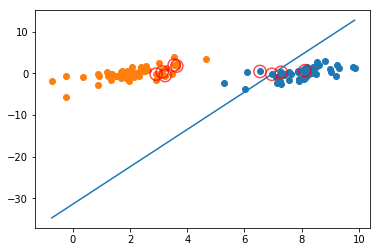

In [80]:
showPlot(xMat, yMat,alpha,b)

In [81]:
"""
数据结构，维护所有需要操作的值
参数说明：
xMat：特征矩阵
yMat：标签矩阵
C：松弛变量
toler：容错率
"""
class optStruct:
    def __init__(self, xMat, yMat, C, toler):
        self.X = xMat #特征矩阵
        self.Y = yMat #数据标签
        self.C = C #松弛变量
        self.tol = toler #容错率
        self.m = xMat.shape[0] #特征矩阵行数
        self.alpha = np.mat(np.zeros((self.m,1))) #根据矩阵行数初始化alpha参数为0
        self.b = 0 #初始化b参数为0
        self.eCa = np.mat(np.zeros((self.m,2))) #根据矩阵行数初始化误差缓存，第一列为是否有效的标志位，第二列为实际误差E的值。


In [82]:
"""
函数功能：计算误差
参数说明：
oS：数据结构
k：标号为k的数据
返回:
Ek：标号为k的数据误差
"""
def calcEk(oS, k):
    fXk = np.multiply(oS.alpha,oS.Y).T*(oS.X*oS.X[k,:].T) + oS.b
    Ek = fXk - oS.Y[k]
    return Ek

In [84]:
"""
内循环启发方式
参数说明：
i：标号为i的数据的索引值
oS：数据结构
Ei：标号为i的数据误差
返回:
j, maxK：标号为j或maxK的数据的索引值
Ej：标号为j的数据误差
"""
def selectJ(i, oS, Ei):
    maxK = -1; maxDeltaE = 0; Ej = 0 #初始化
    oS.eCa[i] = [1,Ei] #根据Ei更新误差缓存
    eca = np.nonzero(oS.eCa[:,0].A)[0] #返回误差不为0的数据的索引值
    if (len(eca)) > 1: #有不为0的误差
        for k in eca: #遍历,找到最大的Ek
            if k == i: continue #不计算i,浪费时间
            Ek = calcEk(oS, k) #计算Ek
            deltaE = abs(Ei - Ek) #计算|Ei-Ek|
            if (deltaE > maxDeltaE): #找到maxDeltaE
                maxK = k
                maxDeltaE = deltaE
                Ej = Ek
        return maxK, Ej #返回maxK,Ej
    else: #没有不为0的误差
        j = selectJrand(i, oS.m) #随机选择alpha_j的索引值
        Ej = calcEk(oS, j) #计算Ej
    return j, Ej #j,Ej

In [85]:
"""
函数功能：计算Ek,并更新误差缓存
参数说明：
oS：数据结构
k：标号为k的数据的索引值
返回:无
"""
def updateEk(oS, k):
    Ek = calcEk(oS, k) #计算Ek
    oS.eCa[k] = [1,Ek] #更新误差缓存

In [91]:
def innerL(i, oS):
    #步骤1：计算误差Ei
    Ei = calcEk(oS, i)
    #优化alpha,设定一定的容错率。
    if ((oS.Y[i] * Ei < -oS.tol) and (oS.alpha[i] < oS.C)) or ((oS.Y[i] * Ei > oS.tol) and (oS.alpha[i] > 0)):
        #使用内循环启发方式选择alpha_j,并计算Ej
        j,Ej = selectJ(i, oS, Ei)
        #保存更新前的alpha值，使用深拷贝
        alphaIold = oS.alpha[i].copy()
        alphaJold = oS.alpha[j].copy()
        #步骤2：计算上下界L和H
        if (oS.Y[i] != oS.Y[j]):
            L = max(0, oS.alpha[j] - oS.alpha[i])
            H = min(oS.C, oS.C + oS.alpha[j] - oS.alpha[i])
        else:
            L = max(0, oS.alpha[j] + oS.alpha[i] - oS.C)
            H = min(oS.C, oS.alpha[j] + oS.alpha[i])
        if L == H:
            #print("L==H")
            return 0
        #步骤3：计算学习率eta
        eta = 2.0 * oS.X[i,:] * oS.X[j,:].T - oS.X[i,:] * oS.X[i,:].T - oS.X[j,:] *oS.X[j,:].T
        if eta >= 0:
            #print("eta>=0")
            return 0
        #步骤4：更新alpha_j
        oS.alpha[j] -= oS.Y[j] * (Ei - Ej)/eta
        #步骤5：修剪alpha_j
        oS.alpha[j] = clipAlpha(oS.alpha[j],H,L)
        #更新Ej至误差缓存
        updateEk(oS, j)
        if (abs(oS.alpha[j] - alphaJold) < 0.00001):
            #print("alpha_j变化太小")
            return 0
        #步骤6：更新alpha_i
        oS.alpha[i] += oS.Y[j]*oS.Y[i]*(alphaJold - oS.alpha[j])
        #更新Ei至误差缓存
        updateEk(oS, i)
        #步骤7：更新b_1和b_2
        b1 = oS.b - Ei- oS.Y[i]*(oS.alpha[i]-alphaIold)*oS.X[i,:]*oS.X[i,:].T -oS.Y[j]*(oS.alpha[j]-alphaJold)*oS.X[i,:]*oS.X[j,:].T
        b2 = oS.b - Ej- oS.Y[i]*(oS.alpha[i]-alphaIold)*oS.X[i,:]*oS.X[j,:].T -oS.Y[j]*(oS.alpha[j]-alphaJold)*oS.X[j,:]*oS.X[j,:].T
        #步骤8：根据b_1和b_2更新b
        if (0 < oS.alpha[i]) and (oS.C > oS.alpha[i]):
            oS.b = b1
        elif (0 < oS.alpha[j]) and (oS.C > oS.alpha[j]):
            oS.b = b2
        else:
            oS.b = (b1 + b2)/2
        return 1 #如果有任意一对alpha发生改变，则返回1
    else:
        return 0 #如果没有alpha对发生改变，则返回0

In [92]:
def smoP(xMat, yMat, C, toler, maxIter):
    oS = optStruct(xMat, yMat, C, toler) #初始化数据结构
    iters = 0 #初始化当前迭代次数
    entireSet = True; alpha_ = 0
    #遍历整个数据集都alpha也没有更新或者超过最大迭代次数,则退出循环
    while (iters < maxIter) and ((alpha_ > 0) or (entireSet)):
        alpha_ = 0
        if entireSet: #遍历整个数据集
            for i in range(oS.m):
                alpha_ += innerL(i,oS) #使用优化的SMO算法
                #print(f"全样本遍历:第{iters}次迭代 样本:{i}, alpha优化次数:{alpha_}")
            iters += 1
        else: #遍历不在边界0和C的alpha
            nonBoundIs = np.nonzero((oS.alpha.A > 0) * (oS.alpha.A < C))[0]
            for i in nonBoundIs:
                alpha_ += innerL(i,oS)
                #print(f"非边界遍历:第{iters}次迭代 样本:{i}, alpha优化次数:{alpha_}")
            iters += 1
        if entireSet: #遍历一次后改为非边界遍历
            entireSet = False
        elif (alpha_ == 0): #如果alpha没有更新,计算全样本遍历
            entireSet = True
            #print(f"迭代次数: {iters}")
    return oS.b,oS.alpha #返回SMO算法计算的b和alphas

In [94]:
%time b,alpha =smoP(xMat, yMat, 0.6, 0.001, 100)

Wall time: 178 ms


In [95]:
b

matrix([[-2.89901748]])

In [97]:
alpha[alpha>0]

matrix([[0.06961952, 0.0169055 , 0.0169055 , 0.0272699 , 0.04522972,
         0.0272699 , 0.0243898 , 0.06140181, 0.06140181]])

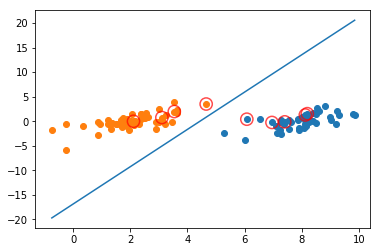

In [98]:
showPlot(xMat, yMat,alpha,b)

In [104]:
"""
函数功能：计算w
参数说明:
xMat: 特征矩阵
yMat: 标签矩阵
alpha：alpha值
返回:
w：计算得到的w
"""
def calcWs(alpha,xMat,yMat):
    m,n = xMat.shape
    w = np.zeros((n,1))
    for i in range(m):
        w += np.multiply(alpha[i]*yMat[i],xMat[i,:].T) #w的计算公式
    return w


In [100]:
alpha[0]*yMat[0]

matrix([[-0.06961952]])

In [101]:
xMat[0,:].T

matrix([[3.542485],
        [1.977398]])

In [103]:
np.multiply(alpha[0]*yMat[0],xMat[0,:].T)

matrix([[-0.2466261],
        [-0.1376655]])

In [105]:
w = calcWs(alpha,xMat,yMat)
w

array([[ 0.65307162],
       [-0.17196128]])

In [107]:
def calcAcc(xMat,yMat,w,b):
    yhat=[]
    re=0
    m,n = xMat.shape
    for i in range(m):
        result=xMat[i]*np.mat(w)+b #超平面计算公式
        if result<0:
            yhat.append(-1)
        else:
            yhat.append(1)
        if yhat[i]==yMat[i]:
            re +=1
    acc = re/m
    print(f'模型预测准确率为{acc}')
    return acc

In [108]:
calcAcc(xMat,yMat,w,b)

模型预测准确率为1.0


1.0

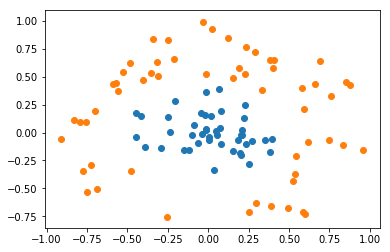

In [109]:
#导入数据集1，查看数据分布
xMat,yMat = loadDataSet('testSetRBF.txt')
showDataSet(xMat, yMat)

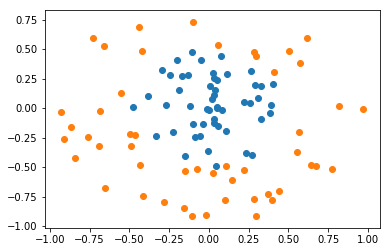

In [110]:
#导入数据集2，查看数据分布
xMat,yMat = loadDataSet('testSetRBF2.txt')
showDataSet(xMat, yMat)

In [162]:
def kernelTrans(X, A, kTup):
    m,n = X.shape
    K = np.mat(np.zeros((m,1)))
    if kTup[0] == 'lin':
        K = X * A.T #线性核函数,只进行内积。
    elif kTup[0] == 'rbf': #高斯核函数,根据高斯核函数公式进行计算
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow*deltaRow.T
        K = np.exp(K/(-1*kTup[1]**2)) #计算高斯核K
    else:
        raise NameError('核函数无法识别')
    return K #返回计算的核K

In [156]:
class optStruct:
    def __init__(self, xMat, yMat, C, toler, kTup):
        self.X = xMat #特征矩阵
        self.Y = yMat #标签矩阵
        self.C = C #惩罚因子
        self.tol = toler #容错率
        self.m = xMat.shape[0] #特征矩阵行数
        self.alpha = np.mat(np.zeros((self.m,1))) #根据矩阵行数初始化alpha参数为0
        self.b = 0 #初始化b参数为0
        self.eCa = np.mat(np.zeros((self.m,2))) #根据矩阵行数初初始化误差缓存，第一列为是否有效的标志位，第二列为实际的误差E的值。
        self.K = np.mat(np.zeros((self.m,self.m))) #初始化核K
        for i in range(self.m): #计算所有数据的核K
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)


In [157]:
def calcEk(oS, k):
    fXk = np.multiply(oS.alpha,oS.Y).T*oS.K[:,k] + oS.b
    Ek = fXk - oS.Y[k]
    return Ek

In [158]:
def innerL(i, oS):
    #步骤1：计算误差Ei
    Ei = calcEk(oS, i)
    #优化alpha,设定一定的容错率。
    if ((oS.Y[i] * Ei < -oS.tol) and (oS.alpha[i] < oS.C)) or ((oS.Y[i] * Ei > oS.tol)and (oS.alpha[i] > 0)):
        #使用内循环启发方式2选择alpha_j,并计算Ej
        j,Ej = selectJ(i, oS, Ei)
        #保存更新前的aplpha值，使用深拷贝
        alphaIold = oS.alpha[i].copy()
        alphaJold = oS.alpha[j].copy()
        #步骤2：计算上下界L和H
        if (oS.Y[i] != oS.Y[j]):
            L = max(0, oS.alpha[j] - oS.alpha[i])
            H = min(oS.C, oS.C + oS.alpha[j] - oS.alpha[i])
        else:
            L = max(0, oS.alpha[j] + oS.alpha[i] - oS.C)
            H = min(oS.C, oS.alpha[j] + oS.alpha[i])
        if L == H:
            #print("L==H")
            return 0
        #步骤3：计算eta
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j]
        if eta >= 0:
            #print("eta>=0")
            return 0
        #步骤4：更新alpha_j
        oS.alpha[j] -= oS.Y[j] * (Ei - Ej)/eta
        #步骤5：修剪alpha_j
        oS.alpha[j] = clipAlpha(oS.alpha[j],H,L)
        #更新Ej至误差缓存
        updateEk(oS, j)
        if (abs(oS.alpha[j] - alphaJold) < 0.00001):
            #print("alpha_j变化太小")
            return 0
        #步骤6：更新alpha_i
        oS.alpha[i] += oS.Y[j]*oS.Y[i]*(alphaJold - oS.alpha[j])
        #更新Ei至误差缓存
        updateEk(oS, i)
        #步骤7：更新b_1和b_2
        b1 = oS.b - Ei- oS.Y[i]*(oS.alpha[i]-alphaIold)*oS.K[i,i]- oS.Y[j]*(oS.alpha[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.Y[i]*(oS.alpha[i]-alphaIold)*oS.K[i,j]- oS.Y[j]*(oS.alpha[j]-alphaJold)*oS.K[j,j]
        #步骤8：根据b_1和b_2更新b
        if (0 < oS.alpha[i]) and (oS.C > oS.alpha[i]):
            oS.b = b1
        elif (0 < oS.alpha[j]) and (oS.C > oS.alpha[j]):
            oS.b = b2
        else:
            oS.b = (b1 + b2)/2
        return 1
    else:
        return 0

In [159]:
def smoP(xMat, yMat, C, toler, maxIter,kTup = ('lin',0)):
    oS = optStruct(xMat, yMat, C, toler,kTup) #初始化数据结构
    iters = 0 #初始化当前迭代次数
    entireSet = True; alpha_ = 0
    #遍历整个数据集都alpha也没有更新或者超过最大迭代次数,则退出循环
    while (iters < maxIter) and ((alpha_ > 0) or (entireSet)):
        alpha_ = 0
        if entireSet: #遍历整个数据集
            for i in range(oS.m):
                alpha_ += innerL(i,oS) #使用优化的SMO算法
                #print(f"全样本遍历:第{iters}次迭代 样本:{i}, alpha优化次数:{alpha_}")
            iters += 1
        else: #遍历不在边界0和C的alpha
            nonBoundIs = np.nonzero((oS.alpha.A > 0) * (oS.alpha.A < C))[0]
            for i in nonBoundIs:
                alpha_ += innerL(i,oS)
                #print(f"非边界遍历:第{iters}次迭代 样本:{i}, alpha优化次数:{alpha_}")
            iters += 1
        if entireSet: #遍历一次后改为非边界遍历
            entireSet = False
        elif (alpha_ == 0): #如果alpha没有更新,计算全样本遍历
            entireSet = True
        #print(f"迭代次数: {iters}")
    return oS.b,oS.alpha #返回SMO算法计算的b和alphas

In [127]:
xMat,yMat = loadDataSet('testSet.txt')

In [129]:
%time b,alpha = smoP(xMat, yMat, 0.6, 0.001, 100,kTup = ('lin',0))

Wall time: 124 ms


In [130]:
xMat,yMat = loadDataSet('testSetRBF.txt')

In [131]:
%time b,alpha = smoP(xMat, yMat, 0.6, 0.001, 100,kTup = ('rbf',5))

Wall time: 1.18 s


In [132]:
b

matrix([[5.55111512e-17]])

In [134]:
alpha[alpha>0]

matrix([[0.6, 0.6]])

In [135]:
xMat,yMat = loadDataSet('testSetRBF.txt') #加载训练集

In [136]:
k1=1.3
b,alpha = smoP(xMat, yMat, 200, 0.0001, 100, ('rbf', k1))

In [149]:
alpha[alpha>0].A

array([[200., 200., 200., 200., 200., 200., 200., 200., 200., 200.]])

In [141]:
#alpha.A > 0

In [144]:
len(np.nonzero(alpha.A > 0)[0])

10

In [137]:
svInd = np.nonzero(alpha.A > 0)[0]

In [152]:
np.sign(0)

0

In [160]:
def testRbf(k1 = 1.3):
    xMat,yMat = loadDataSet('testSetRBF.txt') #加载训练集
    b,alpha = smoP(xMat, yMat, 200, 0.0001, 100, ('rbf', k1)) #根据训练集计算b和alpha
    svInd = np.nonzero(alpha.A > 0)[0] #获得支持向量的索引
    sVs = xMat[svInd] #获得支持向量
    labelSV = yMat[svInd] #获得支持向量的标签
    print(f"支持向量个数:{sVs.shape[0]}")
    m,n = xMat.shape
    errorCount = 0
    for i in range(m):
        K = kernelTrans(sVs,xMat[i,:],('rbf', k1)) #计算各个点的核
        predict = K.T * np.multiply(labelSV,alpha[svInd]) + b #根据支持向量的点，预测结果
        if np.sign(predict) != np.sign(yMat[i]): #sign()函数功能是x<0则返回-1，x=0返回0，x>0返回1
            errorCount += 1 #预测错误的个数
    acc_train = 1-errorCount/m #计算准确率
    #print(f"训练集准确率为：{acc_train}")
    xMat,yMat = loadDataSet('testSetRBF2.txt') #加载测试集
    errorCount = 0
    m,n = xMat.shape
    for i in range(m):
        K = kernelTrans(sVs,xMat[i,:],('rbf', k1)) #此处支持向量sVs是根据训练集得出的
        predict=K.T * np.multiply(labelSV,alpha[svInd]) + b #此处的支持向量的标签labelSV、alpha、b都是根据训练集计算出的
        if np.sign(predict) != np.sign(yMat[i]):
            errorCount += 1
    acc_test = 1-errorCount/m
    #print(f"测试集准确率为：{acc_test}")
    return acc_train,acc_test

In [163]:
testRbf(k1 = 1.3)

支持向量个数:26


(0.91, 0.8200000000000001)

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['simhei']#显示中文

支持向量个数:26
支持向量个数:27
支持向量个数:26
支持向量个数:26
支持向量个数:26
支持向量个数:26
支持向量个数:26
支持向量个数:23
支持向量个数:27
支持向量个数:26


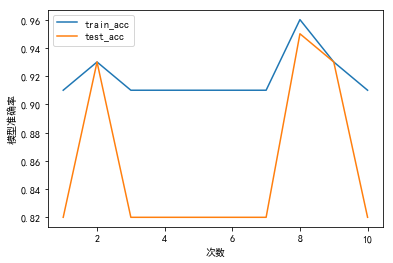

In [165]:
train_acc=[]
test_acc=[]
for i in range(10):
    a,b = testRbf(k1 = 1.3)
    train_acc.append(a)
    test_acc.append(b)
plt.plot(range(1,11),train_acc)
plt.plot(range(1,11),test_acc)
plt.xlabel('次数')
plt.ylabel('模型准确率')
plt.legend(['train_acc','test_acc'])
plt.show()

In [166]:
np.arange(0.1,1.4,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3])

支持向量个数:89
支持向量个数:43
支持向量个数:30
支持向量个数:25
支持向量个数:24
支持向量个数:16
支持向量个数:12
支持向量个数:16
支持向量个数:17
支持向量个数:24
支持向量个数:25
支持向量个数:23
支持向量个数:27


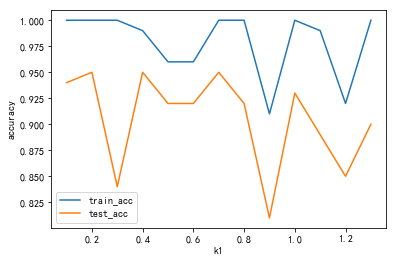

In [167]:
train_acc=[]
test_acc=[]
for k1 in np.arange(0.1,1.4,0.1):
    a,b=testRbf(k1)
    train_acc.append(a)
    test_acc.append(b)
plt.plot(np.arange(0.1,1.4,0.1),train_acc)
plt.plot(np.arange(0.1,1.4,0.1),test_acc)
plt.xlabel('k1')
plt.ylabel('accuracy')
plt.legend(['train_acc','test_acc'])
plt.show()

In [169]:
import os

In [190]:
"""
函数功能：得到特征矩阵和标签矩阵
参数说明：
path:文件夹的路径
"""
def get_Mat(path):
    FileList = os.listdir(path) #提取出文件夹中所有文件的名字
    m = len(FileList) #文件个数
    label = [] #初始化分类标签
    xMat = np.mat(np.zeros((m,1024))) #初始化一个m*1024的全零矩阵
    for i in range(m): #遍历每一个文件
        xMat_i = np.mat(np.zeros((1,1024)) ) #初始化一个1*1024的全零矩阵
        filename = FileList[i] #提取出当前文件名
        #读取文件，结果是一个32行*每一行中是一个32位字符串的dataframe
        txt = pd.read_csv(f'{path}/{filename}',header=None)
        for j in range(32): #遍历当前文件的每一行
            num = txt.iloc[j,:] #当前行中的字符串
            for k in range(32): #遍历字符串中的每一个数据
                xMat_i[0,32*j+k]=int(num[0][k]) #将1*1024矩阵中相应位置替换为当前字符串的值，注意要转换成int类型
        xMat[i,:] = xMat_i #将m*1024矩阵中相应的位置替换为该文件的矩阵
        filelabel = int(filename.split('_')[0]) #根据文件名切分出手写数字的值
        if filelabel==9: #将数字9的标签定为-1
            label.append(-1)
        else: #将数字1的标签定为1
            label.append(1)
    yMat=np.mat(label).T #将标签列转换为矩阵
    return xMat,yMat

In [191]:
path='digits/trainingDigits'
xMat,yMat=get_Mat(path)

In [192]:
xMat[:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [193]:
xMat.shape

(402, 1024)

In [194]:
yMat[:10]

matrix([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]])

In [195]:
def testDigits(kTup=('rbf', 10)):
    xMat,yMat = get_Mat('digits/trainingDigits') #得到训练集的特征矩阵和标签矩阵
    b,alpha = smoP(xMat, yMat, 200, 0.0001, 10000, kTup) #根据训练集计算出b和alpha
    svInd = np.nonzero(alpha.A>0)[0] #提取出非零alpha的索引（也就是支持向量的索引）
    sVs=xMat[svInd] #提取出支持向量的特征矩阵
    labelSV = yMat[svInd] #提取出支持向量的标签矩阵
    print(f"支持向量个数:{sVs.shape[0]}" )
    m,n = xMat.shape #m是数据集总行数，n是特征数量
    errorCount = 0 #初始化错误数
    for i in range(m): #遍历每一条数据
        K = kernelTrans(sVs,xMat[i,:],kTup) #进行数据转换
        predict=K.T * np.multiply(labelSV,alpha[svInd]) + b #根据支持向量计算预测结果
        if np.sign(predict) != np.sign(yMat[i]): #检查预测结果与原始标签是否一样
            errorCount += 1 #统计预测错误的个数
    acc_train=1-errorCount/m #计算训练集的准确率
    #print(f"训练集准确率: {acc_train}")
    xMat,yMat = get_Mat('digits/testDigits')
    errorCount = 0
    m,n = xMat.shape
    for i in range(m):
        K = kernelTrans(sVs,xMat[i,:],kTup)
        predict=K.T * np.multiply(labelSV,alpha[svInd]) + b
        if np.sign(predict) != np.sign(yMat[i]):
            errorCount += 1
    acc_test=1-errorCount/m
    #print(f"训练集准确率: {acc_test}")
    return acc_train,acc_test,sVs.shape[0]

In [196]:
testDigits(kTup=('rbf', 10))

支持向量个数:127


(1.0, 0.9946236559139785, 127)

In [197]:
acc_train=[]
acc_test=[]
SVnum=[]
kTups = [('rbf',0.1),('rbf',5),('rbf',10),('rbf',50),('rbf',100),('lin',0)]
for kTup in kTups:
    a,b,c = testDigits(kTup)
    acc_train.append(a)
    acc_test.append(b)
    SVnum.append(c)

支持向量个数:402
支持向量个数:402
支持向量个数:132
支持向量个数:31
支持向量个数:34
支持向量个数:33


In [211]:
df = pd.DataFrame({'内核设置':kTups,
                   '训练准确率':acc_train,
                   '测试准确率':acc_test,
                   '支持向量数':SVnum})

In [212]:
df

,内核设置,训练准确率,测试准确率,支持向量数
0,"(rbf, 0.1)",1.000000,0.478495,402
1,"(rbf, 5)",1.000000,0.967742,402
2,"(rbf, 10)",1.000000,0.994624,132
3,"(rbf, 50)",0.985075,0.973118,31
4,"(rbf, 100)",0.995025,0.989247,34
5,"(lin, 0)",0.992537,0.989247,33


In [213]:
i = df.columns[1]
i

'训练准确率'

In [214]:
x =df.loc[:,i].values

In [215]:
x

array([1.        , 1.        , 1.        , 0.98507463, 0.99502488,
       0.99253731])

In [216]:
np.round(x*100,1)

array([100. , 100. , 100. ,  98.5,  99.5,  99.3])

In [217]:
#将结果进行简单处理，使数据更好看一些
for i in df.columns[1:-1]:
    df.loc[:,i]=[round(x*100,1) for x in df.loc[:,i].values ]

In [218]:
#查看结果
df

,内核设置,训练准确率,测试准确率,支持向量数
0,"(rbf, 0.1)",100.0,47.8,402
1,"(rbf, 5)",100.0,96.8,402
2,"(rbf, 10)",100.0,99.5,132
3,"(rbf, 50)",98.5,97.3,31
4,"(rbf, 100)",99.5,98.9,34
5,"(lin, 0)",99.3,98.9,33
